In [4]:
from roman_numerals import ToArabic, ToRoman

import numpy as np
import os
from encoder import CharacterTable
import random
from sklearn.model_selection import train_test_split

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

DATASET PREPARATION

In [41]:
DATASET_SIZE = 201

samples, labels = [], []

for number in range(1,DATASET_SIZE):
    samples.append(number)
    labels.append(ToRoman(number).roman)

OUTPUT_LEN = len(max(labels, key=len))

for i,label in enumerate(labels):
    labels[i] = label.ljust(OUTPUT_LEN, ' ')

alphabet = "CLXVI "

onehotend = CharacterTable(alphabet)
for i in range(len(labels)):
    labels[i] = onehotend.encode(labels[i], OUTPUT_LEN)

samples = np.array(samples, dtype=np.float32)
labels = np.array(labels, dtype=np.float32)

In [42]:
TRAINING_SIZE = .5

(trainSamples, testSamples, trainLabels, testLabels) = train_test_split(samples, labels,train_size=TRAINING_SIZE)
print('Training samples:',len(trainSamples),', Test samples:',len(testSamples))

Training samples: 100 , Test samples: 100


In [50]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector

model = Sequential()
model.add(Dense(16, input_dim=1) )
model.add(RepeatVector(OUTPUT_LEN)) #length of the text
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(6,activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy','mae'])
num_epochs = 0
History = []

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                32        
                                                                 
 repeat_vector_6 (RepeatVec  (None, 9, 16)             0         
 tor)                                                            
                                                                 
 lstm_18 (LSTM)              (None, 9, 128)            74240     
                                                                 
 lstm_19 (LSTM)              (None, 9, 128)            131584    
                                                                 
 lstm_20 (LSTM)              (None, 9, 128)            131584    
                                                                 
 dense_13 (Dense)            (None, 9, 6)              774       
                                                      

In [51]:
def check_model(verbose=0,show_training=1):
    prediction = model.predict(samples)

    result = []
    for pred in prediction:
        result.append(onehotend.decode(pred))
    correct = 0
    for i in range(1,len(prediction)):
        if(not show_training and i in trainSamples): continue
        train=''
        if i in trainSamples: train='[T]'

        ok=''
        if(result[i]==onehotend.decode(labels[i])):
            correct+=1
            ok = "[ok]"
        if(verbose==1):
            print(i,'->',result[i], ok,train)
    if verbose==0:
        for i in range(5):
            x = random.randrange(DATASET_SIZE-1)
            print(x,'->',result[x])
    print('Correct',correct,'of',len(prediction),' = ',(correct/len(prediction)))
    return correct,len(prediction),(correct/len(prediction))
check_model(1)

7/7 [==============================] - 1s 6ms/step
1 -> CCCCCCCCC  
2 -> CCCCCCCCC  
3 -> CCCCCCCCC  [T]
4 -> CCCCCCCCC  
5 -> CCCCCCCCC  [T]
6 -> CCCCCCCCC  
7 -> CCCCCCCCC  [T]
8 -> CCCCCCCCC  
9 -> CCCCCCCCC  
10 -> CCCCCCCCC  
11 -> CCCCCCCCC  
12 -> CCCCCCCCC  
13 -> CCCCCCCCC  [T]
14 -> CCCCCCCCC  [T]
15 -> CCCCCCCCC  [T]
16 -> CCCCCCCCC  
17 -> CCCCCCCCC  [T]
18 -> CCCCCCCCC  
19 -> CCCCCCCCC  
20 -> CCCCCCCCC  
21 -> CCCCCCCCC  
22 -> CCCCCCCCC  
23 -> CCCCCCCCC  [T]
24 -> CCCCCCCCC  
25 -> CCCCCCCCC  [T]
26 -> CCCCCCCCC  [T]
27 -> CCCCCCCCC  [T]
28 -> CCCCCCCCC  [T]
29 -> CCCCCCCCC  
30 -> CCCCCCCCC  [T]
31 -> CCCCCCCCC  [T]
32 -> CCCCCCCCC  [T]
33 -> CCCCCCCCC  [T]
34 -> CCCCCCCCC  [T]
35 -> CCCCCCCCC  [T]
36 -> CCCCCCCCC  
37 -> CCCCCCCCC  
38 -> CCCCCCCCC  [T]
39 -> CCCCCCCCC  
40 -> CCCCCCCCC  
41 -> CCCCCCCCC  [T]
42 -> CCCCCCCCC  
43 -> CCCCCCCCC  [T]
44 -> CCCCCCCCC  [T]
45 -> CCCCCCCCC  
46 -> CCCCCCCCC  
47 -> CCCCCCCCC  [T]
48 -> CCCCCCCCC  [T]
49 -> CCCCCCCCC  
50 -

(0, 200, 0.0)

In [54]:
EPOCHS=100

Iterations = int(40000/EPOCHS)
BATCH_SIZE = int(len(trainSamples)/2)
print('Training with',len(trainSamples),'samples',EPOCHS,'epochs and batch_size=',BATCH_SIZE)
print("Epochs so far",num_epochs)
for x in range(Iterations):
    H = model.fit(trainSamples, trainLabels, epochs=EPOCHS,verbose=0,batch_size=BATCH_SIZE)
    num_epochs += EPOCHS
    print()
    print("Epoch {} - loss ={:6.3f}, loss improvement ={:6.3f}".
          format(num_epochs,H.history['loss'][-1], H.history['loss'][0]-H.history['loss'][-1]))
    
    c,l,p = check_model()
    History.append(p)
print("Done")


Training with 100 samples 100 epochs and batch_size= 50
Epochs so far 100

Epoch 200 - loss = 0.472, loss improvement = 0.146
7/7 [==============================] - 0s 6ms/step
26 -> XXVI     
90 -> XCXI     
68 -> LXXI     
182 -> CLXXX    
197 -> CLCXX    
Correct 22 of 200  =  0.11

Epoch 300 - loss = 0.387, loss improvement = 0.083
7/7 [==============================] - 0s 6ms/step
108 -> CXI      
125 -> CXXXI    
173 -> CLXXXII  
167 -> CLXXII   
174 -> CLXXXII  
Correct 28 of 200  =  0.14

Epoch 400 - loss = 0.341, loss improvement = 0.037
7/7 [==============================] - 0s 6ms/step
137 -> CXXXII   
97 -> XC       
7 -> XIII     
95 -> XC       
105 -> CVI      
Correct 27 of 200  =  0.135

Epoch 500 - loss = 0.303, loss improvement = 0.049
7/7 [==============================] - 0s 6ms/step
34 -> XXXI     
142 -> CXXXII   
93 -> XCV      
192 -> CLXXX    
82 -> LXXXVI   
Correct 29 of 200  =  0.145

Epoch 600 - loss = 0.284, loss improvement = 0.042
7/7 [=================

Text(0.5, 1.0, 'Accuracy prediction of translation arabic into roman number, step=100 Epoch')

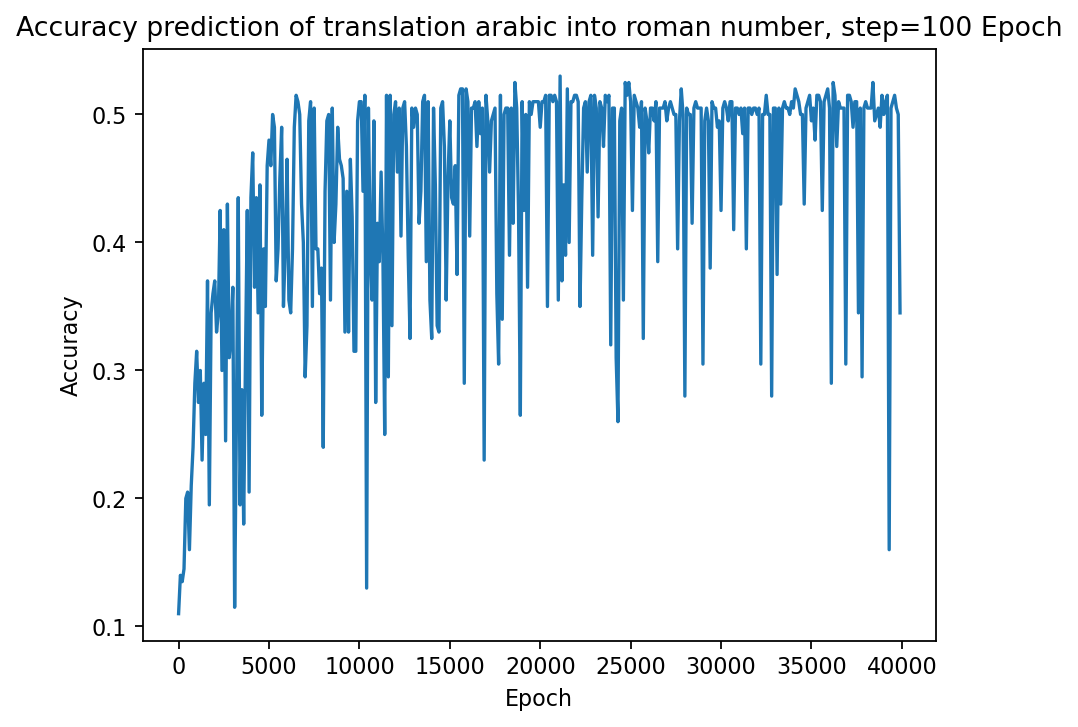

In [195]:
import matplotlib.pyplot as plt
plt.figure(dpi=160)
plt.plot(np.array(range(0,len(History)))*EPOCHS, History)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy prediction of translation arabic into roman number, step=100 Epoch")

Interrupted while there is no improvement

In [192]:
input=123
x = model.predict([input])
print("Input: " + str(input) + 
      ", Pred: '" + str(onehotend.decode(x[0]))+
      "' in arabic: " + str(ToArabic(onehotend.decode(x[0])).arabic))

1/1 [==============================] - 0s 37ms/step
Input: 123, Pred: 'CXXIII   ' in arabic: 123


In [178]:
model.save('model_v2.keras')

In [179]:
import keras
model_saved = keras.models.load_model("model_v2.keras")

In [189]:
for i in range(1,200):
    input=i
    x = model.predict([input], verbose=0)
    try:
        ara = ToArabic(onehotend.decode(x[0])).arabic
    except:
        ara = -1
    finally:
        print("Input: " + str(input) + 
            ", Pred: '" + str(onehotend.decode(x[0]))+
            "' in arabic: " + str(ara))



Input: 1, Pred: 'CXCCLLLLL' in arabic: -1
Input: 2, Pred: 'CIIILLLLL' in arabic: -1
Input: 3, Pred: 'III      ' in arabic: 3
Input: 4, Pred: 'II       ' in arabic: 2
Input: 5, Pred: 'V        ' in arabic: 5
Input: 6, Pred: 'V        ' in arabic: 5
Input: 7, Pred: 'VII      ' in arabic: 7
Input: 8, Pred: 'VII      ' in arabic: 7
Input: 9, Pred: 'XII      ' in arabic: 12
Input: 10, Pred: 'XIII     ' in arabic: 13
Input: 11, Pred: 'XIII     ' in arabic: 13
Input: 12, Pred: 'XIII     ' in arabic: 13
Input: 13, Pred: 'XIII     ' in arabic: 13
Input: 14, Pred: 'XIV      ' in arabic: 14
Input: 15, Pred: 'XV       ' in arabic: 15
Input: 16, Pred: 'XVI      ' in arabic: 16
Input: 17, Pred: 'XVII     ' in arabic: 17
Input: 18, Pred: 'XVII     ' in arabic: 17
Input: 19, Pred: 'XVII     ' in arabic: 17
Input: 20, Pred: 'XVII     ' in arabic: 17
Input: 21, Pred: 'XXIII    ' in arabic: 23
Input: 22, Pred: 'XXIII    ' in arabic: 23
Input: 23, Pred: 'XXIII    ' in arabic: 23
Input: 24, Pred: 'XXV     